# Importing Libraries for Visualization

In [6]:
import tweepy
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm
from tqdm import tqdm
from ipywidgets import IntProgress
import seaborn as sns

# Importing Datasets

The imported datasets are three fully labeled and sentiment analyzed datasets.
The train dataset is the one that we expect that it can predict the overal outcome properly
The result other two are only can be valid if the result of the train dataset is correct. In case that the model can provide the correct outcome on the 42nd election test dataset and 43rd election dataset, it can be concluded that the model works properly on unseen data from not only the 42nd election tweets, but also from other federal election campaign period tweets.

In [11]:
elxn42_train = pd.read_csv('Data/df_transformer_result_train.csv')
elxn42_train.drop(['Unnamed: 0','index'], axis = 1, inplace=True)

elxn42_test = pd.read_csv('Data/df_transformer_result_test.csv')
elxn42_test.drop(['Unnamed: 0','index'], axis = 1, inplace=True)

elxn43_test = pd.read_csv('Data/df_transformer_result_elxn43.csv')
elxn43_test.drop(['Unnamed: 0','index'], axis = 1, inplace=True)


# Defining impression and normalized version of follower counts, like counts, and retweets counts
# for tall the three above datasets
elxn42_train['roberta_compound'] = (elxn42_train['roberta_pos'] - elxn42_train['roberta_neg'] + 1)/2
elxn42_train['Normalized_follower'] = elxn42_train['Author Follower']/(elxn42_train['Author Follower'] + elxn42_train['Author Friends'])
elxn42_train['Normalized_likes'] = elxn42_train['Likes_count']/(elxn42_train['Likes_count'] + elxn42_train['Retweet_count'])
elxn42_train['Normalized_retweets'] = elxn42_train['Retweet_count']/(elxn42_train['Likes_count'] + elxn42_train['Retweet_count'])
elxn42_train['impression'] = elxn42_train['roberta_compound'] * (elxn42_train['Normalized_follower'] + elxn42_train['Normalized_likes'] + elxn42_train['Normalized_retweets']) / 3

elxn42_test['roberta_compound'] = (elxn42_test['roberta_pos'] - elxn42_test['roberta_neg'] + 1)/2
elxn42_test['Normalized_follower'] = elxn42_test['Author Follower']/(elxn42_test['Author Follower'] + elxn42_test['Author Friends'])
elxn42_test['Normalized_likes'] = elxn42_test['Likes_count']/(elxn42_test['Likes_count'] + elxn42_test['Retweet_count'])
elxn42_test['Normalized_retweets'] = elxn42_test['Retweet_count']/(elxn42_test['Likes_count'] + elxn42_test['Retweet_count'])
elxn42_test['impression'] = elxn42_test['roberta_compound'] * (elxn42_test['Normalized_follower'] + elxn42_test['Normalized_likes'] + elxn42_test['Normalized_retweets']) / 3

elxn43_test['roberta_compound'] = (elxn43_test['roberta_pos'] - elxn42_train['roberta_neg'] + 1)/2
elxn43_test['Normalized_follower'] = elxn43_test['Author Follower']/(elxn43_test['Author Follower'] + elxn43_test['Author Friends'])
elxn43_test['Normalized_likes'] = elxn43_test['Likes_count']/(elxn43_test['Likes_count'] + elxn43_test['Retweet_count'])
elxn43_test['Normalized_retweets'] = elxn43_test['Retweet_count']/(elxn43_test['Likes_count'] + elxn43_test['Retweet_count'])
elxn43_test['impression'] = elxn43_test['roberta_compound'] * (elxn43_test['Normalized_follower'] + elxn43_test['Normalized_likes'] + elxn43_test['Normalized_retweets']) / 3


# As the data is imported again, we make sure that the Tweet date column is converted back to datetime object
# Convert Tweet Date column datatype to datetime
elxn42_train['Tweet Date'] = pd.to_datetime(elxn42_train['Tweet Date'])
elxn42_test['Tweet Date'] = pd.to_datetime(elxn42_test['Tweet Date'])
elxn43_test['Tweet Date'] = pd.to_datetime(elxn43_test['Tweet Date'])




## Distribution of Tweets over time

The below code visualize a histogram for the total amount of tweets in the dataset that were tweeted during the 42nd Canadian Federal election campaign. This has been done separately for the train set and test sets.
According to the distribution, both the train/test sets follow the same pattern.

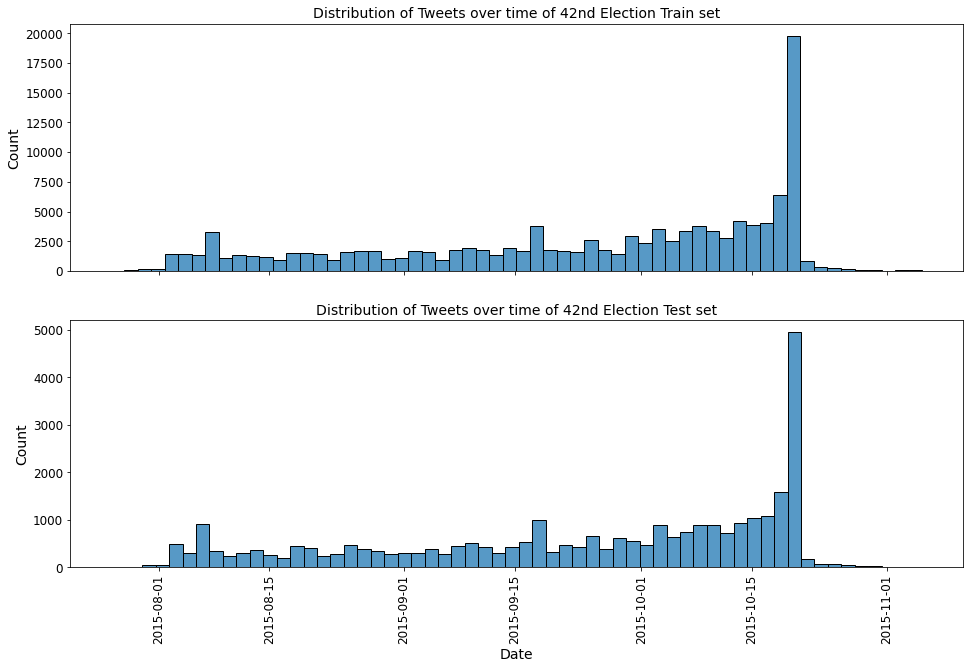

In [3]:
# Make an emtry figure space and the axis for subplots
fig, ax = plt.subplots(2, 1, figsize=(16, 10), sharex = True)

# use histogram in Seaborn library with 60 bins
sns.histplot(ax = ax[0], data=elxn42_train, x='Tweet Date', bins=60)
sns.histplot(ax = ax[1], data=elxn42_test, x='Tweet Date', bins=60)

# Adjust the labels and fonts properties for title, x axis and y axis

ax[1].tick_params(axis="x", labelrotation=90, labelsize = 12)
ax[0].tick_params(axis="y", labelsize = 12)
ax[1].tick_params(axis="y", labelsize = 12)
ax[0].set_xlabel('Date',fontsize=14)
ax[1].set_xlabel('Date',fontsize=14)
ax[0].set_ylabel('Count',fontsize=14)
ax[1].set_ylabel('Count',fontsize=14)
ax[0].set_title('Distribution of Tweets over time of 42nd Election Train set',fontsize=14)
ax[1].set_title('Distribution of Tweets over time of 42nd Election Test set',fontsize=14)


plt.show()

# This last step is optional
fig.savefig('Figures/42nd_distribution_tweet_over_time.png', dpi=300, bbox_inches='tight')

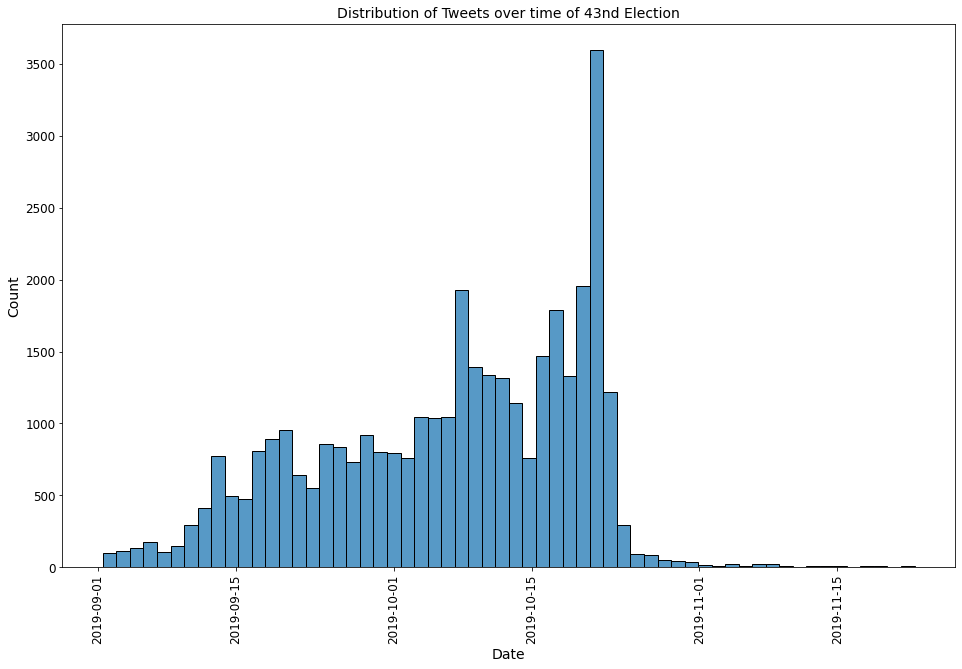

In [23]:
# Same process as above for the 43rd federal election dataset
# Make an empry figure space and the axis
fig, ax = plt.subplots(1, 1, figsize=(16, 10), sharex = True)


sns.histplot(data=elxn43_test, x='Tweet Date', bins=60)

# Adjust the labels and fonts properties for title, x axis and y axis
ax.tick_params(axis="x", labelrotation=90, labelsize = 12)
ax.tick_params(axis="y", labelsize = 12)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_title('Distribution of Tweets over time of 43nd Election',fontsize=14)


plt.show()

fig.savefig('Figures/43nd_distribution_tweet_over_time.png', dpi=300, bbox_inches='tight')

It can be seen that the pattern for the 43rd election is different which makes it more interesting to see if the final outcome can estimate the political party with the most seats. This will be visualize soon


Below is the same plot as above, but split down to the day-to-day level for each month. An interesting pattern is that the more it gets close to the election day, the more people starts tweeting about the event. Therefore, One thing is for sure is that the cumulative sentiment during the final days before October 19 and 20 of 2015, consist the most part of public opinion for the election result. This idea can become more valid because the more it get close to the election day, people tend to change their opinion less. Thus, for example a user who right positive tweet about liberals on the last day before the election, is more tend to vote for liberals on the election.

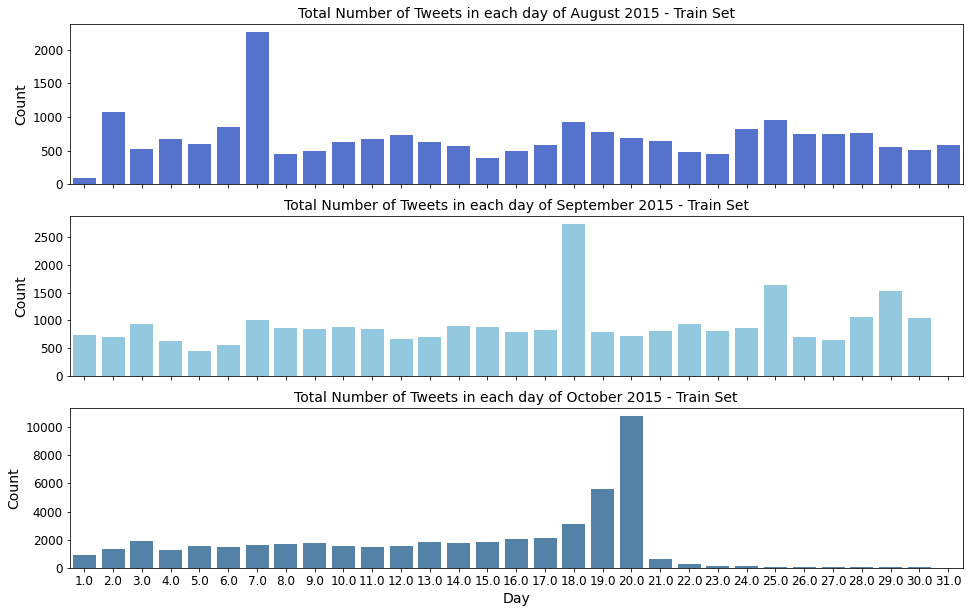

In [8]:
# FOR THE 42ND ELECTION TRAIN SET
# Creating temporary aggregated datasets for each month durint the campaing period
Aug = elxn42_train.groupby([elxn42_train[elxn42_train['Tweet Date'].dt.month == 8]['Tweet Date'].dt.day]).count()
Aug = Aug[['Tweet Date','impression']]
Sep = elxn42_train.groupby([elxn42_train[elxn42_train['Tweet Date'].dt.month == 9]['Tweet Date'].dt.day]).count()
Sep = Sep[['Tweet Date','impression']]
Oct = elxn42_train.groupby([elxn42_train[elxn42_train['Tweet Date'].dt.month == 10]['Tweet Date'].dt.day]).count()
Oct = Oct[['Tweet Date','impression']]

# Make an empry figure space and the axis
fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex = True)

# Adding bar plots to each of the subplots that made above
sns.barplot(ax=axes[0], x=Aug.index, y = 'impression', data = Aug, ci=None, color='royalblue')
axes[0].set_title('Total Number of Tweets in each day of August 2015 - Train Set', fontsize = 14)

sns.barplot(ax=axes[1], x=Sep.index, y = 'impression', data = Sep, ci=None, color='skyblue')
axes[1].set_title('Total Number of Tweets in each day of September 2015 - Train Set', fontsize = 14)

sns.barplot(ax=axes[2], x=Oct.index, y = 'impression', data = Oct, ci=None, color='steelblue')
axes[2].set_title('Total Number of Tweets in each day of October 2015 - Train Set', fontsize = 14)


# Adjust the labels and fonts properties for x axis and y axis
axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)
axes[2].tick_params(axis="x", labelsize = 12)

axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)
axes[2].tick_params(axis="y", labelsize = 12)

axes[0].set_xlabel('',fontsize=14)
axes[1].set_xlabel('',fontsize=14)
axes[2].set_xlabel('Day',fontsize=14)

axes[0].set_ylabel('Count',fontsize=14)
axes[1].set_ylabel('Count',fontsize=14)
axes[2].set_ylabel('Count',fontsize=14)



plt.show()

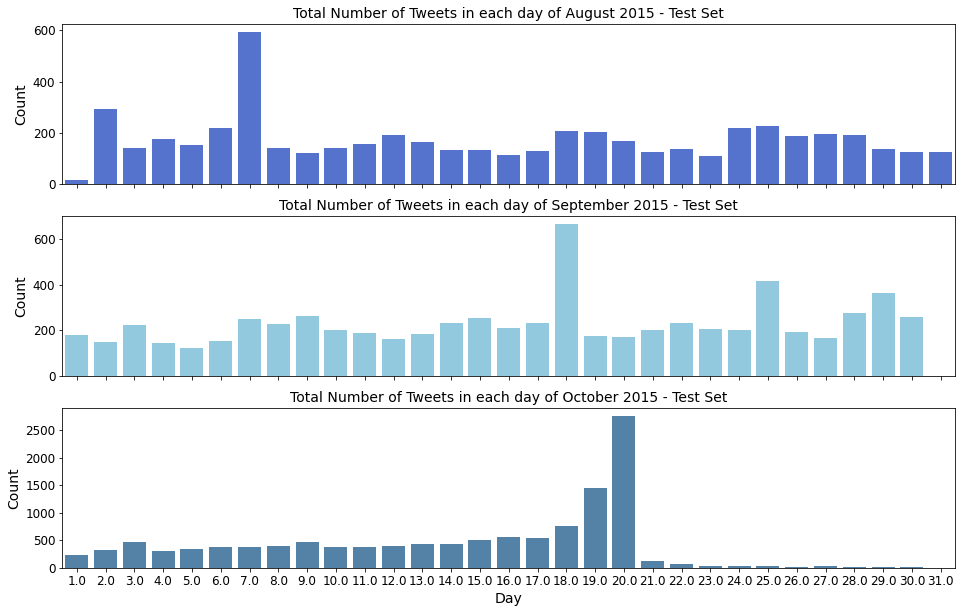

In [9]:
# FOR THE 42ND ELECTION TRAIN SET
# Creating temporary aggregated datasets for each month durint the campaing period
Aug = elxn42_test.groupby([elxn42_test[elxn42_test['Tweet Date'].dt.month == 8]['Tweet Date'].dt.day]).count()
Aug = Aug[['Tweet Date','impression']]
Sep = elxn42_test.groupby([elxn42_test[elxn42_test['Tweet Date'].dt.month == 9]['Tweet Date'].dt.day]).count()
Sep = Sep[['Tweet Date','impression']]
Oct = elxn42_test.groupby([elxn42_test[elxn42_test['Tweet Date'].dt.month == 10]['Tweet Date'].dt.day]).count()
Oct = Oct[['Tweet Date','impression']]

# Make an empry figure space and the axis
fig, axes = plt.subplots(3, 1, figsize=(16, 10), sharex = True)

# Adding bar plots to each of the subplots that made above
sns.barplot(ax=axes[0], x=Aug.index, y = 'impression', data = Aug, ci=None, color='royalblue')
axes[0].set_title('Total Number of Tweets in each day of August 2015 - Test Set', fontsize = 14)

sns.barplot(ax=axes[1], x=Sep.index, y = 'impression', data = Sep, ci=None, color='skyblue')
axes[1].set_title('Total Number of Tweets in each day of September 2015 - Test Set', fontsize = 14)

sns.barplot(ax=axes[2], x=Oct.index, y = 'impression', data = Oct, ci=None, color='steelblue')
axes[2].set_title('Total Number of Tweets in each day of October 2015 - Test Set', fontsize = 14)


# Adjust the labels and fonts properties for x axis and y axis
axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)
axes[2].tick_params(axis="x", labelsize = 12)

axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)
axes[2].tick_params(axis="y", labelsize = 12)

axes[0].set_xlabel('',fontsize=14)
axes[1].set_xlabel('',fontsize=14)
axes[2].set_xlabel('Day',fontsize=14)

axes[0].set_ylabel('Count',fontsize=14)
axes[1].set_ylabel('Count',fontsize=14)
axes[2].set_ylabel('Count',fontsize=14)



plt.show()

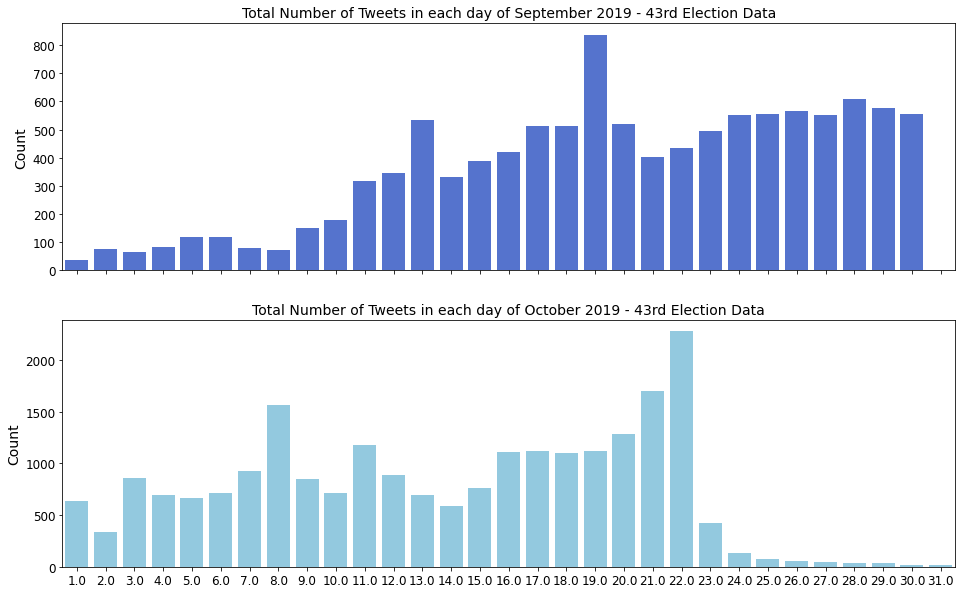

In [34]:
# FOR THE 43RD ELECTION DATASET
# Creating temporary aggregated datasets for each month durint the campaing period
Sep = elxn43_test.groupby([elxn43_test[elxn43_test['Tweet Date'].dt.month == 9]['Tweet Date'].dt.day]).count()
Sep = Sep[['Tweet Date','impression']]
Oct = elxn43_test.groupby([elxn43_test[elxn43_test['Tweet Date'].dt.month == 10]['Tweet Date'].dt.day]).count()
OCt = Oct[['Tweet Date','impression']]

# Make an empry figure space and the axis
fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex = True)

# Adding bar plots to each of the subplots that made above
sns.barplot(ax=axes[0], x=Sep.index, y = 'impression', data = Sep, ci=None, color='royalblue')
axes[0].set_title('Total Number of Tweets in each day of September 2019 - 43rd Election Data', fontsize = 14)

sns.barplot(ax=axes[1], x=Oct.index, y = 'impression', data = Oct, ci=None, color='skyblue')
axes[1].set_title('Total Number of Tweets in each day of October 2019 - 43rd Election Data', fontsize = 14)



# Adjust the labels and fonts properties for x axis and y axis
axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)


axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)


axes[0].set_xlabel('',fontsize=14)
axes[1].set_xlabel('',fontsize=14)


axes[0].set_ylabel('Count',fontsize=14)
axes[1].set_ylabel('Count',fontsize=14)



plt.show()

The 2019 election also follow the same pattern for the total number of tweets. As it get closer to the election day, the number of daily tweets also increased.

## Distribution of Tweets over time for each political party

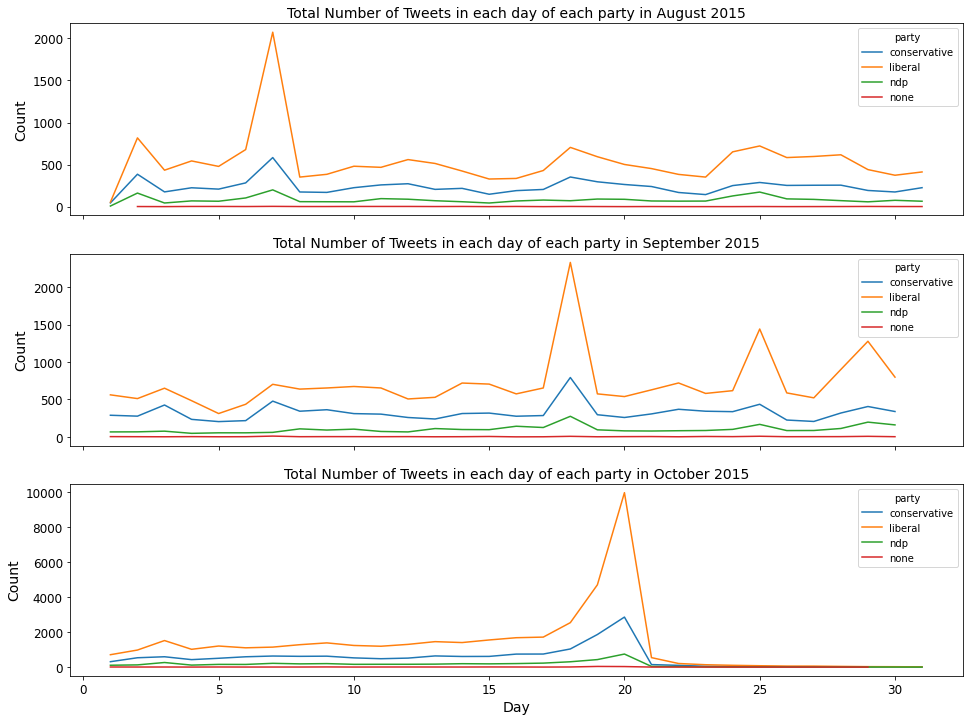

In [10]:
# Creating temporary aggregated datasets for each month of each party during the campaing period 
Aug = results_df.groupby([results_df[results_df['Tweet Date'].dt.month == 8]['Tweet Date'].dt.day,results_df['party']]).count()
Aug = Aug.unstack()['impression'].stack().reset_index()
Sep = results_df.groupby([results_df[results_df['Tweet Date'].dt.month == 9]['Tweet Date'].dt.day,results_df['party']]).count()
Sep = Sep.unstack()['impression'].stack().reset_index()
Oct = results_df.groupby([results_df[results_df['Tweet Date'].dt.month == 10]['Tweet Date'].dt.day,results_df['party']]).count()
Oct = Oct.unstack()['impression'].stack().reset_index()

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex = True)


sns.lineplot(ax=axes[0], x='Tweet Date', y= 0 ,hue = 'party',  data=Aug)
axes[0].set_title('Total Number of Tweets in each day of each party in August 2015', fontsize = 14)

sns.lineplot(ax=axes[1], x='Tweet Date', y= 0 ,hue = 'party',  data=Sep)
axes[1].set_title('Total Number of Tweets in each day of each party in September 2015', fontsize = 14)

sns.lineplot(ax=axes[2], x='Tweet Date', y= 0 ,hue = 'party',  data=Oct)
axes[2].set_title('Total Number of Tweets in each day of each party in October 2015', fontsize = 14)


axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)
axes[2].tick_params(axis="x", labelsize = 12)

axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)
axes[2].tick_params(axis="y", labelsize = 12)

axes[0].set_xlabel('',fontsize=14)
axes[1].set_xlabel('',fontsize=14)
axes[2].set_xlabel('Day',fontsize=14)

axes[0].set_ylabel('Count',fontsize=14)
axes[1].set_ylabel('Count',fontsize=14)
axes[2].set_ylabel('Count',fontsize=14)



plt.show()


Generally speaking, the above plots show shows that the overal number of people talking about liberals are more than the other two popular parties.

In [36]:
# Simple EDA to view the top 20 users with the most tweets in the dataset
top_users = elxn42_train.groupby('Author name').count().reset_index().sort_values(['party'], ascending=False).head(30)[['Author name', 'party']]

top_users = top_users.rename(columns={'party': 'Tweet Count'}).reset_index(drop = True)
top_users

,Author name,Tweet Count
0,Dave Morrison,887
1,🎯 𝐂𝐥𝐞𝐩𝐭𝐨𝐜𝐫𝐚𝐭𝐢𝐞 𝐌𝐜𝐊𝐢𝐧𝐬𝐞𝐲 🎯,395
2,🌻🇨🇦Joanne 🇨🇦🌻,377
3,Christine Huddleston,372
4,Rose,340
5,Bergg69,337
6,Robin,335
7,Yvonne Dean ☕🌈,317
8,Pete Quily,262
9,sabou,262


In [38]:
# EDA for viewing the top 20 hashtags in in the 42nd election training set
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(elxn42_train['Full Text2'][elxn42_train['roberta_compound'] > 0.2])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive

['realchange',
 'saskatoonwest',
 'lgbt',
 'harper',
 'racist',
 'elxn2015',
 'parkhp',
 'gotv',
 'voteselfie',
 'elxn2015',
 'thecampaign',
 '22votes',
 'montarville',
 'polcan',
 'blocqc',
 'polqc',
 'pnpcbc',
 'voteabc',
 'ivotedndp',
 'ready4change',
 'stopharper',
 'cpc',
 'icewrites',
 'tcmedia',
 'hiveapp',
 'elxn2015',
 'cometogether',
 'ctvelection',
 'yycskyview',
 'cpc',
 'duffy',
 'affordablehousing',
 'ndp',
 'cpc',
 'cbcwdr',
 'fed2015',
 'cop21',
 'gpc',
 'liberal',
 'leapin',
 'elxn2015',
 'voteharperout',
 'votenation',
 'iamcanadian',
 'harperslastday',
 'liberals',
 'liberalparty',
 'macdebate',
 'breaking',
 'munkdebate',
 'polcan',
 'blocqc',
 'munkdebate',
 'elxn2015',
 'stopha',
 'bluejays',
 'cometogether',
 'elxn2015',
 'kenthehr',
 'yyccentre',
 'montreal',
 'e',
 'ndp',
 'lpc',
 'gpc',
 'thanksgiving',
 'ableg',
 'yegfed',
 'abpoli',
 'yeg',
 'yqr',
 'bcpoli',
 'macdebate',
 'buzzfeed',
 'humanrights',
 'mu',
 'brockville',
 'harperanetflixshow',
 'hairgate',

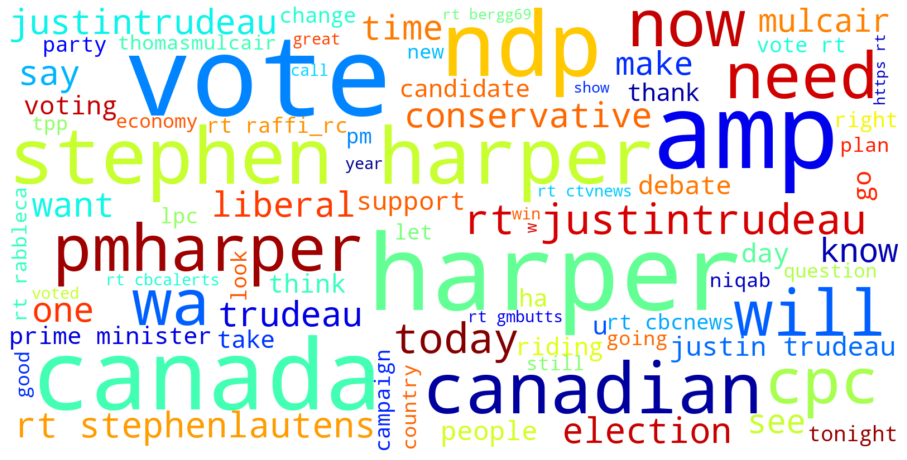

In [39]:
# EDA for showing the most common words in the training set for 42nd election regardless of political party
# this can be helpful in the future analysis in case we want to add more categories and diversities to our labels:
#Including classifying the tweets by the topic they are talking about (e.g. health) and then see the
# Correlation between the topic, political paties and the winner party

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(16, 13))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

word_cloud(elxn42_train['Full Text2'])


## Comparison of the two sentimental analysis approaches

Vader sentiment and RoBERTa sentiment are two popular natural language processing tools used for sentiment analysis. Vader sentiment, short for Valence Aware Dictionary and sEntiment Reasoner, is a rule-based tool that uses a lexicon of words and their sentiment scores to analyze the sentiment of a text. It also takes into account the intensity of the sentiment and the presence of negation words.

On the other hand, RoBERTa sentiment is a neural network-based tool that uses contextualized word embeddings to understand the sentiment of a text. RoBERTa sentiment is capable of understanding the nuances of language and can analyze the sentiment of a text based on the overall context.

The main difference between Vader sentiment and Roberta sentiment is their approach to sentiment analysis. Vader sentiment relies on a pre-defined lexicon of words and rules to analyze the sentiment of a text, while Roberta sentiment uses a deep learning model to understand the sentiment in the context of the text. As a result, Roberta sentiment is generally more accurate and can provide more nuanced insights into the sentiment of a text. However, Vader sentiment is often faster and more straightforward to use, making it a popular choice for quick sentiment analysis tasks.

It is expected that the machine learning approach (RoBERTa) can provide a more non-neutral sentiment as it is trained on a larger dataset and it can understand nuances of language which is super helpful in public opinion analysis. The VADER sentiment is expected to have more neutral values as it is more ruled-based and word-base approach for givign sentiment to the text document and don't care about the actual context of the text.

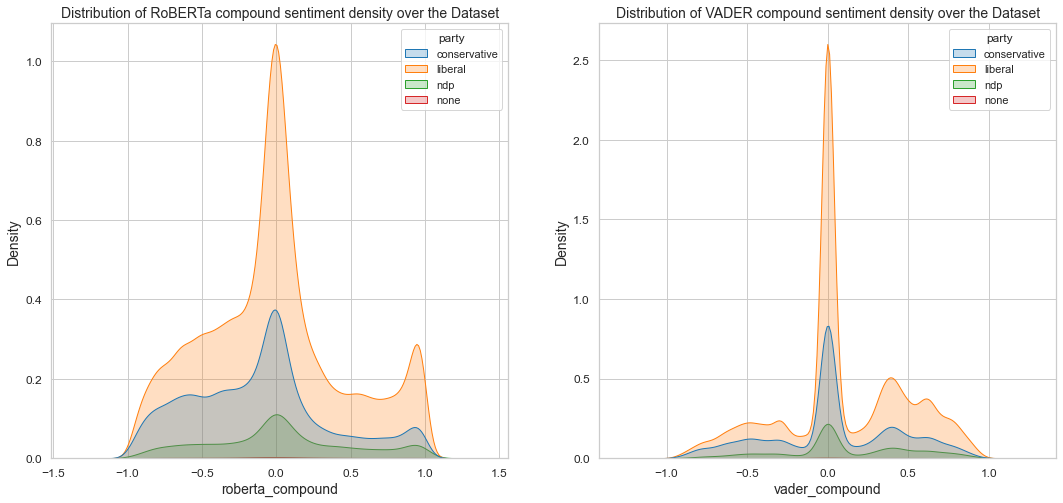

In [163]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.kdeplot(ax = axes[0] ,x='roberta_compound', data=results_df, hue='party', palette='tab10', fill = True)
axes[0].set_title('Distribution of RoBERTa compound sentiment density over the Dataset', fontsize = 14)

sns.kdeplot(ax = axes[1] ,x='vader_compound', data=results_df, hue='party', palette='tab10', fill = True)
axes[1].set_title('Distribution of VADER compound sentiment density over the Dataset', fontsize = 14)

axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)

axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)

axes[0].set_xlabel('roberta_compound', fontsize=14)
axes[1].set_xlabel('vader_compound',fontsize=14)

axes[0].set_ylabel('Density',fontsize=14)
axes[1].set_ylabel('Density',fontsize=14)


plt.show()

As expected, RoBERTa model provide a more non-neutral sentiment for each of the tweets of each party and therefore for the caluclation of impression, we use the RoBERTa sentiment result rather than VADER approach.
Also the other reason is that it is the fundamental of current GPT language models which definitely provide a more powerful tool for text analysis.

# Density plot of tweets impression

Below we provide one the last plots for our final decisions which is the density distribution of tweets impression. It is expected overally, we party has the highest tweet impression in the dataset. Higher impression means more public inclination to vote for that party at the election day.

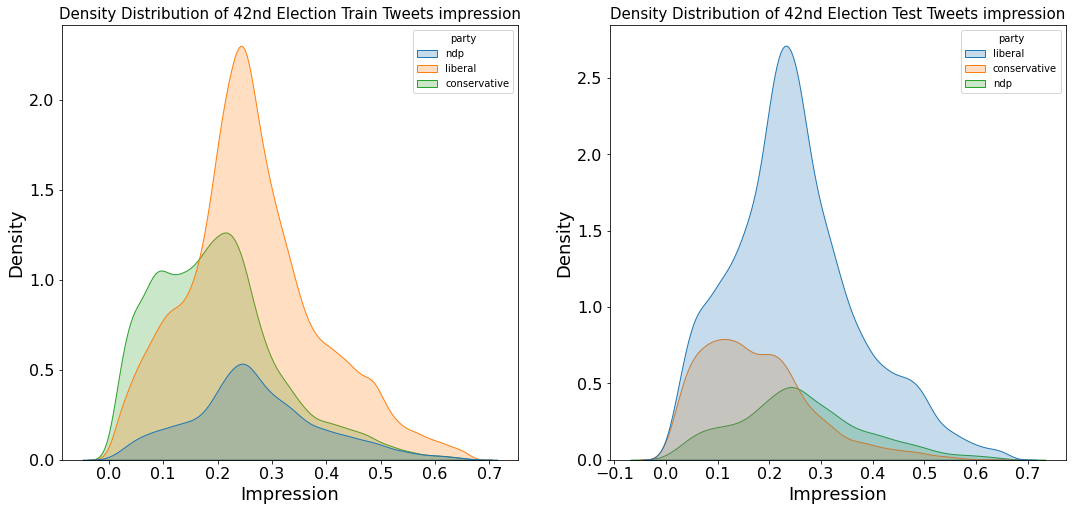

In [22]:
# FOR THE 42ND ELECTION TRAIN SET AND TEST SET
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.kdeplot(ax = axes[0] ,x='impression', data=elxn42_train, hue='party', palette='tab10', fill = True)
axes[0].set_title('Density Distribution of 42nd Election Train Tweets impression', fontsize = 15)

sns.kdeplot(ax = axes[1] ,x='impression', data=elxn42_test, hue='party', palette='tab10', fill = True)
axes[1].set_title('Density Distribution of 42nd Election Test Tweets impression', fontsize = 15)

axes[0].tick_params(axis="x", labelsize = 16)
axes[0].tick_params(axis="y", labelsize = 16)
axes[0].set_xlabel('Impression', fontsize=18)
axes[0].set_ylabel('Density',fontsize=18)

axes[1].tick_params(axis="x", labelsize = 16)
axes[1].tick_params(axis="y", labelsize = 16)
axes[1].set_xlabel('Impression', fontsize=18)
axes[1].set_ylabel('Density',fontsize=18)


plt.show()

fig.savefig('Figures/42nd_Impression_Density.png', dpi=300, bbox_inches='tight')

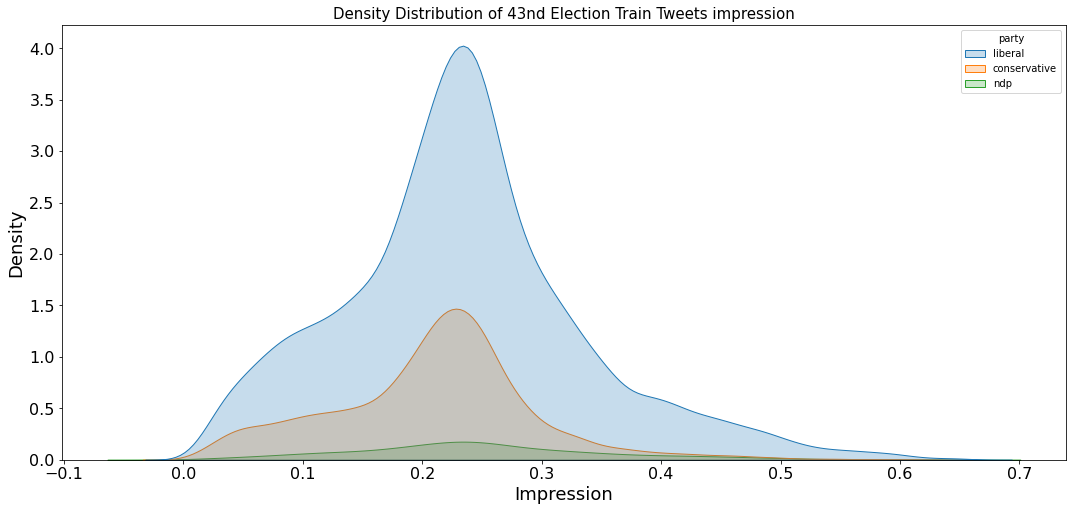

In [40]:
# FOR THE 43ND ELECTION DATASET
fig, axes = plt.subplots(1, 1, figsize=(18, 8))

sns.kdeplot(ax = axes ,x='impression', data=elxn43_test, hue='party', palette='tab10', fill = True)
axes.set_title('Density Distribution of 43nd Election Train Tweets impression', fontsize = 15)

axes.tick_params(axis="x", labelsize = 16)
axes.tick_params(axis="y", labelsize = 16)
axes.set_xlabel('Impression', fontsize=18)
axes.set_ylabel('Density',fontsize=18)



plt.show()

fig.savefig('Figures/43nd_Impression_Density.png', dpi=300, bbox_inches='tight')

According to the above plot for all the datasets, the liberals has the highest impression amongst the other two which means people note only tweet more about them, but also write more positive about them on Twitter.
This is a good indication for deciding which party might get more seats in the parliament.

# FINAL PREDICTION

## Cumulative sum of the Impression and Final Public Opinion

The idea here is that the cumulative sum of the tweets impression is kind of equal to the public opinion of people who are voting. even though a person might tweet positive for a political party on the very first days of the campaign And then switch back to talk negative about the same party on the days after or talk positive about another party the cumulative sum of the impressions we'll take that into account. As a result, the cumulative sum of the impression of each tweet throughout the whole campaign period, Can give us a good perspective on the public opinion of the people about each of the political parties.

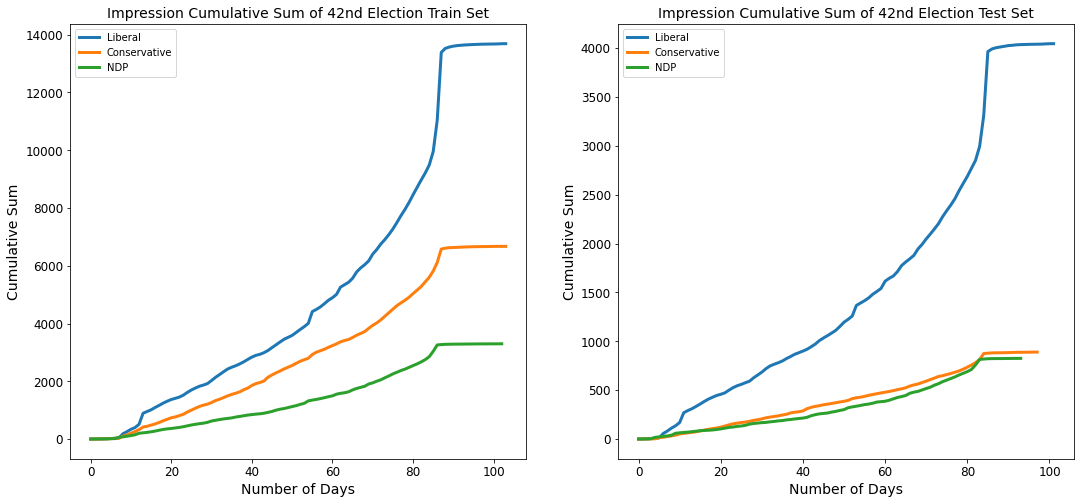

In [115]:
# Temporarily split the train dataset into three different datasets for each political parties
elxn42_train_liberal = elxn42_train[elxn42_train['party'] == 'liberal']
elxn42_train_conservative = elxn42_train[elxn42_train['party'] == 'conservative']
elxn42_train_ndp = elxn42_train[elxn42_train['party'] == 'ndp']

# Temporarily split the test dataset into three different datasets for each political parties
elxn42_test_liberal = elxn42_test[elxn42_test['party'] == 'liberal']
elxn42_test_conservative = elxn42_test[elxn42_test['party'] == 'conservative']
elxn42_test_ndp = elxn42_test[elxn42_test['party'] == 'ndp']

# Make a temporary dataset for the cumulative sum of impressions for liberals in the train set of 42nd election
elxn42_train_cumsum_impression_liberal = pd.DataFrame(
    {'Day' : range(elxn42_train_liberal.groupby([elxn42_train_liberal['Tweet Date'].dt.month,elxn42_train_liberal['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_train_liberal.groupby([elxn42_train_liberal['Tweet Date'].dt.month,elxn42_train_liberal['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_train_cumsum_impression_liberal['cum_impression'] = elxn42_train_cumsum_impression_liberal['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for liberals in the test set of 42nd election
elxn42_test_cumsum_impression_liberal = pd.DataFrame( 
            {'Day' : range(elxn42_test_liberal.groupby([elxn42_test_liberal['Tweet Date'].dt.month,elxn42_test_liberal['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_test_liberal.groupby([elxn42_test_liberal['Tweet Date'].dt.month,elxn42_test_liberal['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_test_cumsum_impression_liberal['cum_impression'] = elxn42_test_cumsum_impression_liberal['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for conservative in the train set of 42nd election
elxn42_train_cumsum_impression_conservative = pd.DataFrame(
    {'Day' : range(elxn42_train_conservative.groupby([elxn42_train_conservative['Tweet Date'].dt.month,elxn42_train_conservative['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_train_conservative.groupby([elxn42_train_conservative['Tweet Date'].dt.month,elxn42_train_conservative['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_train_cumsum_impression_conservative['cum_impression'] = elxn42_train_cumsum_impression_conservative['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for conservative in teh test set of 42nd election
elxn42_test_cumsum_impression_conservative = pd.DataFrame( 
            {'Day' : range(elxn42_test_conservative.groupby([elxn42_test_conservative['Tweet Date'].dt.month,elxn42_test_conservative['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_test_conservative.groupby([elxn42_test_conservative['Tweet Date'].dt.month,elxn42_test_conservative['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_test_cumsum_impression_conservative['cum_impression'] = elxn42_test_cumsum_impression_conservative['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for NDP in the train set of 42nd election
elxn42_train_cumsum_impression_ndp = pd.DataFrame(
    {'Day' : range(elxn42_train_ndp.groupby([elxn42_train_ndp['Tweet Date'].dt.month,elxn42_train_ndp['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_train_ndp.groupby([elxn42_train_ndp['Tweet Date'].dt.month,elxn42_train_ndp['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_train_cumsum_impression_ndp['cum_impression'] = elxn42_train_cumsum_impression_ndp['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for NDP in the test set of 42nd election
elxn42_test_cumsum_impression_ndp = pd.DataFrame( 
            {'Day' : range(elxn42_test_ndp.groupby([elxn42_test_ndp['Tweet Date'].dt.month,elxn42_test_ndp['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn42_test_ndp.groupby([elxn42_test_ndp['Tweet Date'].dt.month,elxn42_test_ndp['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn42_test_cumsum_impression_ndp['cum_impression'] = elxn42_test_cumsum_impression_ndp['sum_impression'].cumsum()





fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.lineplot(ax = axes[0] ,x='Day' ,y = 'cum_impression' , data=elxn42_train_cumsum_impression_liberal, palette='tab10', label = 'Liberal', lw = 3)
axes[0].set_title('Impression Cumulative Sum of 42nd Election Train Set', fontsize = 14)

sns.lineplot(ax = axes[0] ,x='Day' ,y = 'cum_impression' , data=elxn42_train_cumsum_impression_conservative, palette='tab10', label = 'Conservative', lw = 3)
# axes[0].set_title('Cumulative Sum of 42nd Election Train Set', fontsize = 14)
sns.lineplot(ax = axes[0] ,x='Day' ,y = 'cum_impression' , data=elxn42_train_cumsum_impression_ndp, palette='tab10', label = 'NDP', lw = 3)
# axes[0].set_title('Cumulative Sum of 42nd Election Train Set', fontsize = 14)


sns.lineplot(ax = axes[1] ,x='Day' ,y = 'cum_impression' , data=elxn42_test_cumsum_impression_liberal, palette='tab10', label = 'Liberal', lw = 3)
axes[1].set_title('Impression Cumulative Sum of 42nd Election Test Set', fontsize = 14)

sns.lineplot(ax = axes[1] ,x='Day' ,y = 'cum_impression' , data=elxn42_test_cumsum_impression_conservative, palette='tab10', label = 'Conservative', lw = 3)
# axes[1].set_title('Cumulative Sum of 42nd Election Train Set', fontsize = 14)
sns.lineplot(ax = axes[1] ,x='Day' ,y = 'cum_impression' , data=elxn42_test_cumsum_impression_ndp, palette='tab10', label = 'NDP', lw = 3)
# axes[1].set_title('Cumulative Sum of 42nd Election Train Set', fontsize = 14)

axes[0].tick_params(axis="x", labelsize = 12)
axes[1].tick_params(axis="x", labelsize = 12)

axes[0].tick_params(axis="y", labelsize = 12)
axes[1].tick_params(axis="y", labelsize = 12)

axes[0].set_xlabel('Number of Days', fontsize=14)
axes[1].set_xlabel('Number of Days',fontsize=14)

axes[0].set_ylabel('Cumulative Sum',fontsize=14)
axes[1].set_ylabel('Cumulative Sum',fontsize=14)

plt.show()
fig.savefig('Figures/42nd_cumulative_sum_impression.png', dpi=300, bbox_inches='tight')

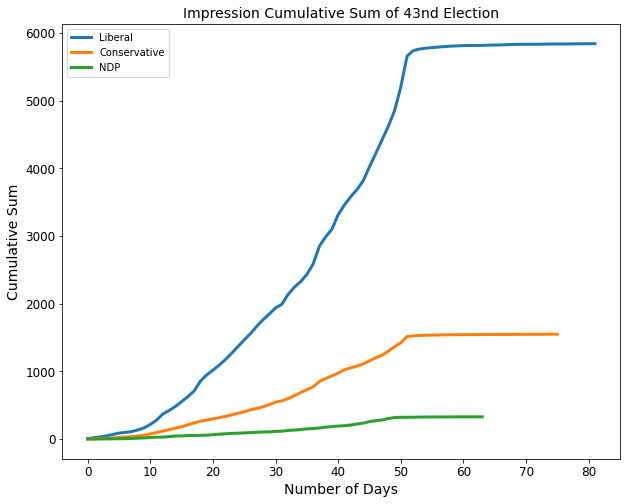

In [116]:
# Temporarily split the 43rd election dataset into three different datasets for each political parties
elxn43_test_liberal = elxn43_test[elxn43_test['party'] == 'liberal']
elxn43_test_conservative = elxn43_test[elxn43_test['party'] == 'conservative']
elxn43_test_ndp = elxn43_test[elxn43_test['party'] == 'ndp']

# Make a temporary dataset for the cumulative sum of impressions for liberals in the Dataset of 43nd election
elxn43_test_cumsum_impression_liberal = pd.DataFrame(
    {'Day' : range(elxn43_test_liberal.groupby([elxn43_test_liberal['Tweet Date'].dt.month,elxn43_test_liberal['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn43_test_liberal.groupby([elxn43_test_liberal['Tweet Date'].dt.month,elxn43_test_liberal['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn43_test_cumsum_impression_liberal['cum_impression'] = elxn43_test_cumsum_impression_liberal['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for Conservatives in the Dataset of 43nd election
elxn43_test_cumsum_impression_conservative = pd.DataFrame( 
            {'Day' : range(elxn43_test_conservative.groupby([elxn43_test_conservative['Tweet Date'].dt.month,elxn43_test_conservative['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn43_test_conservative.groupby([elxn43_test_conservative['Tweet Date'].dt.month,elxn43_test_conservative['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn43_test_cumsum_impression_conservative['cum_impression'] = elxn43_test_cumsum_impression_conservative['sum_impression'].cumsum()

# Make a temporary dataset for the cumulative sum of impressions for NDP in the Dataset of 43nd election
elxn43_test_cumsum_impression_ndp = pd.DataFrame(
    {'Day' : range(elxn43_test_ndp.groupby([elxn43_test_ndp['Tweet Date'].dt.month,elxn43_test_ndp['Tweet Date'].dt.day]).sum()['impression'].shape[0])
    , 'sum_impression' : elxn43_test_ndp.groupby([elxn43_test_ndp['Tweet Date'].dt.month,elxn43_test_ndp['Tweet Date'].dt.day]).sum()['impression'].values
    })
elxn43_test_cumsum_impression_ndp['cum_impression'] = elxn43_test_cumsum_impression_ndp['sum_impression'].cumsum()


fig, axes = plt.subplots(1, 1, figsize=(10, 8))

sns.lineplot(ax = axes ,x='Day' ,y = 'cum_impression' , data=elxn43_test_cumsum_impression_liberal, palette='tab10', label = 'Liberal', lw = 3)
axes.set_title('Impression Cumulative Sum of 43nd Election', fontsize = 14)

sns.lineplot(ax = axes ,x='Day' ,y = 'cum_impression' , data=elxn43_test_cumsum_impression_conservative, palette='tab10', label = 'Conservative', lw = 3)

sns.lineplot(ax = axes ,x='Day' ,y = 'cum_impression' , data=elxn43_test_cumsum_impression_ndp, palette='tab10', label = 'NDP', lw = 3)

axes.tick_params(axis="x", labelsize = 12)

axes.tick_params(axis="y", labelsize = 12)

axes.set_xlabel('Number of Days', fontsize=14)

axes.set_ylabel('Cumulative Sum',fontsize=14)

plt.show()

fig.savefig('Figures/43nd_cumulative_sum_impression.png', dpi=300, bbox_inches='tight')

as can be seen the above plots there are several points that worth mentioning:
- in all of the above plots for 42nd and 43rd federal election the Liberals have the most cumulative sum Of impression until the election day. the second one is conservatives and the third one is the NDP which align well with the official result for the Canadian federal election
- higher cumulative sum indicates that either the the impression of the tweet for the top political party was higher or the total people people and the total tweets that were posted about that political party was higher or both scenario happen at the same time. in any of the mentioned cases that would mean that's political party should have more interest among the public opinion. in the case of our plots we can say that the liberals have more positive opinion amongst the other two.
- the result from the above plots also aligned well with the number of seats of each of the political party in the parliament from the official election results resources.
- the flattened part at the end of each line in all of the plots above is for the time after the election ends and the result announcement. this makes sense because once the results are out people do not tend to express any additional feelings or or talk about the election afterward
- the total amount of data for the 43rd election dataset, is roughly half the size of the 42nd election dataset. however the maximum cumulative sum of the impression of the tweets for liberals in the 43rd election is less than the half of the cumulative sum of the impression of the tweet for liberals in the 42nd election. This also means that the liberals lose some of their interest and popularity in the society or at least between the Twitter users between the year 2015 and 2019. that is the case that exactly matches the official results of the election in 2015 and 2019. the official results show liberals have about 11% less seats in the House of Commons in 2019 then the number of seats that they have in 2015 elections. You can also check these information from the below link:
https://en.wikipedia.org/wiki/2019_Canadian_federal_election#Opinion_polls

**These points prove that the provided model can properly predict the public opinion about different political parties based on the sentiments that comes from a language model and labeled data.
More analysis can be done and more information can be added for future analysis and project**

## Additional EDA: Correlation matrix for each of the dataset

For the EDA purpose, we also provide the correlation between the most used features for our analysis on the 42nd election training dataset.

In [17]:
heatmap_liberal = elxn42_train[elxn42_train['party'] == 'liberal']
heatmap_liberal = heatmap_liberal[['Normalized_follower', 'Normalized_likes',
                                  'Normalized_retweets', 'impression', 'roberta_compound']]
heatmap_conservative = elxn42_train[elxn42_train['party'] == 'conservative']
heatmap_conservative = heatmap_conservative[['Normalized_follower', 'Normalized_likes',
                                              'Normalized_retweets', 'impression', 'roberta_compound']]
heatmap_ndp = elxn42_train[elxn42_train['party'] == 'ndp']
heatmap_ndp = heatmap_ndp[['Normalized_follower', 'Normalized_likes',
                            'Normalized_retweets', 'impression', 'roberta_compound']]


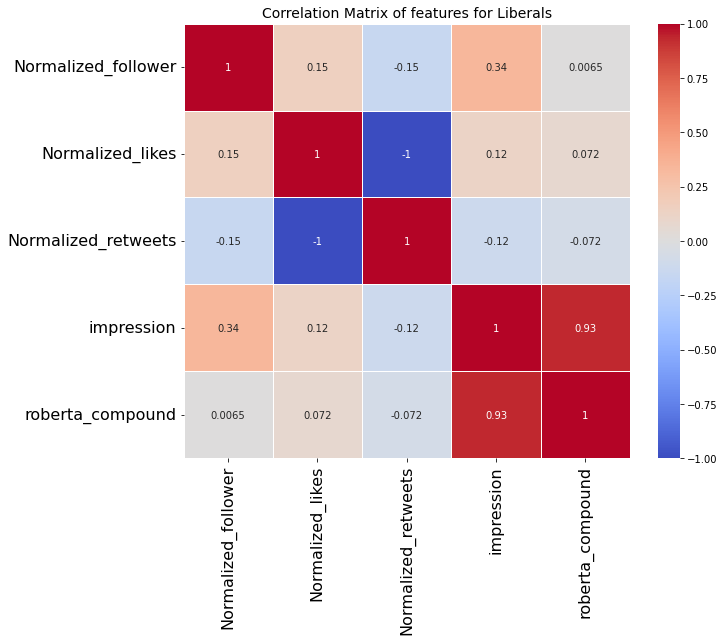

In [37]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(heatmap_liberal.corr(), annot= True, vmin = -1, vmax = +1 , cmap = 'coolwarm', linewidth = 1)

axes.tick_params(axis="x", labelsize = 16)

axes.tick_params(axis="y", labelsize = 16)
axes.set_title('Correlation Matrix of features for Liberals', fontsize = 14)

fig.savefig('Figures/heatmap_42_liberal.png', dpi=300, bbox_inches='tight')

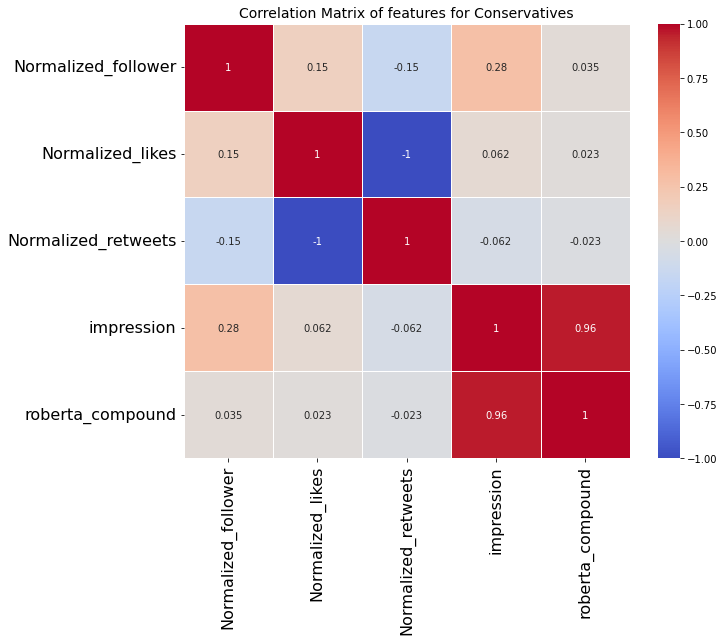

In [38]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(heatmap_conservative.corr(), annot= True, vmin = -1, vmax = +1 , cmap = 'coolwarm', linewidth = 1 )

axes.tick_params(axis="x", labelsize = 16)

axes.tick_params(axis="y", labelsize = 16)
axes.set_title('Correlation Matrix of features for Conservatives', fontsize = 14)


fig.savefig('Figures/heatmap_42_conservative.png', dpi=300, bbox_inches='tight')

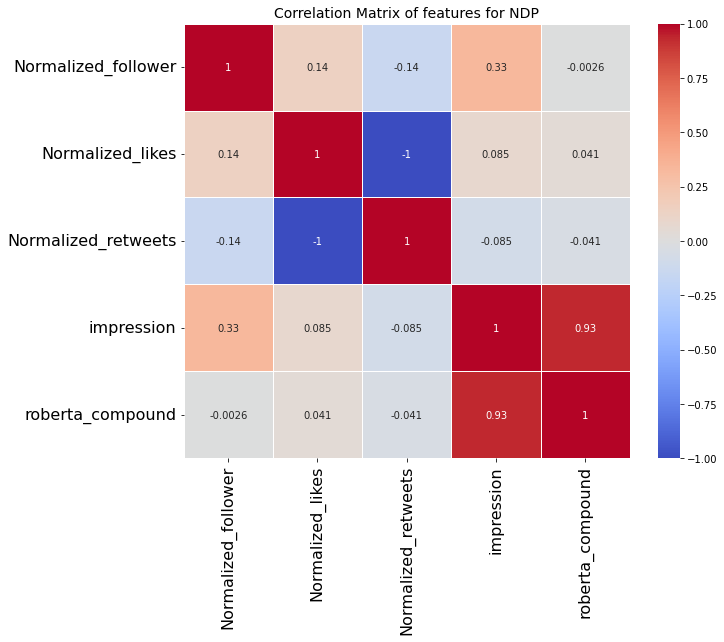

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(heatmap_ndp.corr(), annot= True, vmin = -1, vmax = +1 , cmap = 'coolwarm', linewidth = 1)

axes.tick_params(axis="x", labelsize = 16)

axes.tick_params(axis="y", labelsize = 16)
axes.set_title('Correlation Matrix of features for NDP', fontsize = 14)


fig.savefig('Figures/heatmap_42_ndp.png', dpi=300, bbox_inches='tight')